In [3]:
import time
import json
import requests
import pandas as pd
from tqdm import tqdm

f = open('../data/py150/github_repos.txt')
urls = []
for line in f:
    _, repo_url = line.strip().split(chr(9))
    repo_url = repo_url[repo_url.rfind('/', 0, repo_url.rfind('/') - 1) + 1 :]
    urls.append(repo_url)
f.close()

repos = []
for url in tqdm(urls, total = len(urls)):
    my_token = 'ef305c43723576a6ce4cdac02879a39af44d5293'
    repo_url = f'https://api.github.com/repos/{url}/topics'
    try:
        repo = requests.get(repo_url, headers = {'Authorization' : 'token ' + my_token,
                                                 'Accept' : 'application/vnd.github.mercy-preview+json'}).json()
        repos.append(repo['names'])
    except:
        repos.append([])

f = open('repos.jsonl', 'w')
json.dump({'repos' : repos}, fp = f)
f.close()

100%|█████████████████████████████████████| 8422/8422 [1:53:26<00:00,  1.24it/s]


In [47]:
f = open('repos.jsonl', 'r')
repos = json.loads(f.readline())['repos']
f.close()

True


In [50]:
print(sum([x != [] for x in repos]), '/', len(repos))
print()

cnt = dict()
for x in repos:
    for y in x:
        if (y in cnt):
            cnt[y] += 1
        else:
            cnt[y] = 1
topics = []
for x in cnt:
    topics.append((cnt[x], x))
topics.sort()
for idx, x in enumerate(topics):
    print(len(topics) - idx, x)

1742 / 8422

4257 (1, '163music')
4256 (1, '3d-graphics')
4255 (1, '3d-mathematical-functions')
4254 (1, '3des')
4253 (1, '404')
4252 (1, '6502')
4251 (1, 'a3c')
4250 (1, 'ab')
4249 (1, 'ab-testing')
4248 (1, 'abbreviations')
4247 (1, 'abtest')
4246 (1, 'access-point')
4245 (1, 'account-management')
4244 (1, 'accounting')
4243 (1, 'accounts')
4242 (1, 'accurev')
4241 (1, 'ache')
4240 (1, 'achievements')
4239 (1, 'acis')
4238 (1, 'acm-icpc')
4237 (1, 'acme-client')
4236 (1, 'acoustics')
4235 (1, 'acoustid')
4234 (1, 'active-directory')
4233 (1, 'active-learning')
4232 (1, 'activestate')
4231 (1, 'activity-stream')
4230 (1, 'activitysim')
4229 (1, 'actor')
4228 (1, 'ad-blocker')
4227 (1, 'adaboost')
4226 (1, 'adafruit-io')
4225 (1, 'adaptive-learning')
4224 (1, 'addict')
4223 (1, 'addon')
4222 (1, 'address-book')
4221 (1, 'address-parser')
4220 (1, 'addresses')
4219 (1, 'adfly')
4218 (1, 'admin-boundaries')
4217 (1, 'adobe-cq')
4216 (1, 'adobe-experience-manager')
4215 (1, 'advanced-pers

2071 (1, 'prolog')
2070 (1, 'prometheus')
2069 (1, 'pronunciation')
2068 (1, 'protected-page')
2067 (1, 'protocol-buffers-disassembler')
2066 (1, 'protocol-learning')
2065 (1, 'prov')
2064 (1, 'prov-dm')
2063 (1, 'prov-json')
2062 (1, 'prov-o')
2061 (1, 'provenance-model')
2060 (1, 'ps')
2059 (1, 'psd')
2058 (1, 'pseudo')
2057 (1, 'psma-administrative-boundaries')
2056 (1, 'psma-gnaf')
2055 (1, 'psql')
2054 (1, 'pss')
2053 (1, 'psutil')
2052 (1, 'psycopg2')
2051 (1, 'ptop')
2050 (1, 'ptpython')
2049 (1, 'ptrace')
2048 (1, 'public-transportation')
2047 (1, 'pudb')
2046 (1, 'pulsar')
2045 (1, 'pulseaudio')
2044 (1, 'pump')
2043 (1, 'punctuation')
2042 (1, 'puppetdb')
2041 (1, 'pushbullet')
2040 (1, 'pusher')
2039 (1, 'pushjet')
2038 (1, 'pwa')
2037 (1, 'pxe')
2036 (1, 'pxe-boot')
2035 (1, 'pyart')
2034 (1, 'pyaudioanalysis')
2033 (1, 'pybitmessage')
2032 (1, 'pybuilder')
2031 (1, 'pycuda')
2030 (1, 'pycurl')
2029 (1, 'pydata')
2028 (1, 'pyes')
2027 (1, 'pyez')
2026 (1, 'pyflakes')
2025 (

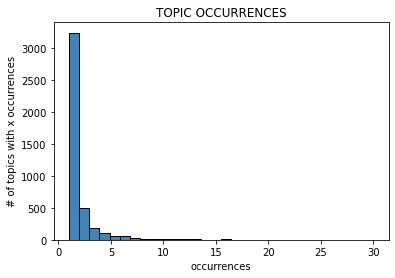

In [81]:
import matplotlib.pyplot as plt
data = [t[0] for t in topics if (t[0] <= 30)]
# data = [1, 1, 1, 2, 2, 7 ,7]
plt.hist(data,
         bins = 30,
         color = 'steelblue',
         edgecolor = 'black')
plt.xlabel('occurrences')
plt.ylabel('# of topics with x occurrences')
plt.title('TOPIC OCCURRENCES')
plt.show()
# print([t[0] for t in topics])

In [70]:
bad_topics = []
for x, y in topics:
    if (x <= 1):
        bad_topics.append(y)
bad_topics.append('python')
bad_topics.append('python2')
bad_topics.append('python3')
bad_topics.append('python-2')
bad_topics.append('python-3')

cnt = 0
for x in repos:
    flag = False
    for y in x:
        if (y not in bad_topics):
            flag = True
    if (flag):
        cnt += 1
print(cnt, '/', len(repos))

1570 / 8422


In [ ]:
# import urllib.request as urllib2
# opener = urllib2.build_opener(urllib2.ProxyHandler({'http' : 'http://127.0.0.1:8889/',
#                                                     'https' : 'https://127.0.0.1:8889/'}))
# urllib2.install_opener(opener)

# inforMation = urllib2.urlopen('http://www.baidu.com').read()
# print('here1')
# inforMation = urllib2.urlopen('http://www.google.com').read()
# print('here2')
# inforMation = urllib2.urlopen('https://www.github.com').read()
# print('here3')
# inforMation = urllib2.urlopen('https://www.github.com/Aaronontheweb/scaffold-py').read()
# print('here4')
# print(inforMation)

In [ ]:
# import urllib.request as urllib2
# from tqdm import tqdm
# opener = urllib2.build_opener(urllib2.ProxyHandler({'http' : 'http://127.0.0.1:8889/',
#                                                     'https' : 'https://127.0.0.1:8889/'}))
# urllib2.install_opener(opener)

# f = open('../data/py150/github_repos.txt')
# urls = []
# for line in f:
#     _, repo_url = line.strip().split(chr(9))
#     repo_url = repo_url[: 4] + 's' + repo_url[4 :]
#     urls.append(repo_url)
# f.close()

# all_topics = []
# for i, repo_url in enumerate(tqdm(urls, total = len(urls))):
#     print(i, repo_url)
#     try:
#         text = urllib2.urlopen(repo_url).read()
#     except:
#         print('fail', i)
#         all_topics.append([-1])
#     else:
#         text = str(text)
#         pos = 0
#         topics = []
#         while True:
#             pos = text.find('title="Topic: ', pos)
#             if (pos == -1):
#                 break
#             topic = text[pos + 14 : text.find('"', pos + 14)]
#             topics.append(topic)
#             x = text.rfind('\\n', 0, pos)
#             y = text.find('\\n', pos)
#             predict = '\\n      <a data-ga-click="Topic, repository page" data-octo-click="topic_click" data-octo-dimensions="topic:' + topic + '" href="/topics/' + topic + '" title="Topic: ' + topic + '" data-view-component="true" class="topic-tag topic-tag-link">'
#             assert(text[x : y] == predict)
#             print(topic)
#             pos += 1
#         all_topics.append(topics)

In [ ]:
# # Download information of users and repos
# import json
# import requests
# import pandas as pd
# import time

# '''Using GitHub REST API'''
# # From a user, get his/her repos
# user_name = 'shizhediao'
# repo_name = 'tensorflow/tensorflow'
# my_token = 'ef305c43723576a6ce4cdac02879a39af44d5293'
# user_url = 'https://api.github.com/users/' + user_name
# repo_url = f'https://api.github.com/repos/{repo_name}/topics'

# user = requests.get(user_url, headers = {'Authorization' : 'token ' + my_token}).json()
# repo = requests.get(repo_url, headers = {'Authorization' : 'token ' + my_token,
#                                          'Accept' : 'application/vnd.github.mercy-preview+json'}).json()
# # user = requests.get(user_url).json()
# # repo = requests.get(repo_url, headers = {'Accept' : 'application/vnd.github.mercy-preview+json'}).json()

# print("my_token  :", my_token)
# print("user_name :", user_name)
# print("repo_name :", repo_name)
# print("user_url  :", user_url)
# print("repo_url  :", repo_url)
# print("user:", user)
# print("repo:", repo)
# print("repo_tags:", repo['names'])